# R2 results for recalculated IC50, AUC and viability values

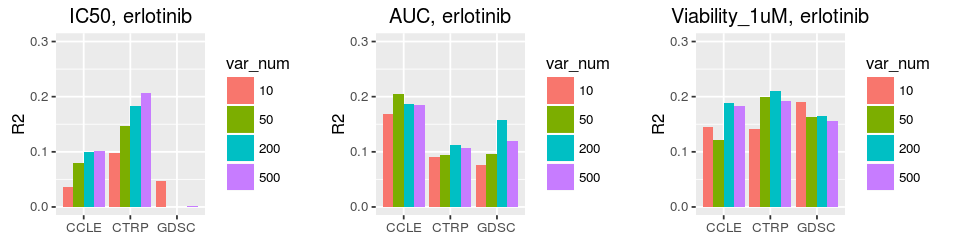

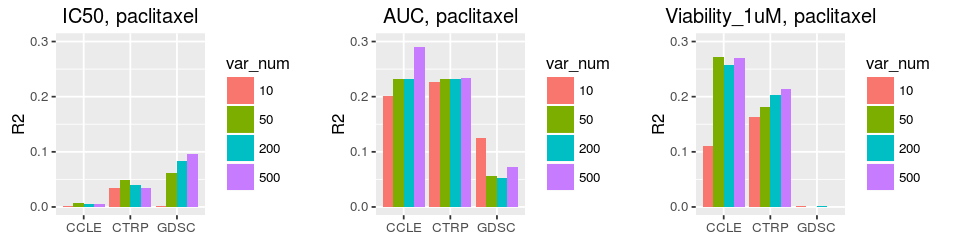

In [10]:
library(ggplot2)
library(gridExtra)
#data to work with
#setwd("/data/kurilov/genestack/phd/analysis_2016/")
load("all_results_an3.RData")
# all_results <- cbind(all_results, c(rep(0,72),rep(1,72)))
# colnames(all_results) <- c("dataset","drug","only_exp", "var_num","RMSE","R2","remove_max_resp")
# save(all_results, file="all_results_an3.RData")
all_results <- as.data.frame(all_results)
set0 <- matrix(unlist(strsplit(as.character(all_results$dataset), split="_", fixed=TRUE)), ncol=3, byrow=TRUE)
set <- set0[,3]
response <- set0[,2]
all_results2 <- cbind(set, response, all_results[,-1])

# 
all_results3 <- all_results2[which(all_results2$remove_max_resp==0),]
response_list <- c("ic50","auc","viab")
response_list2 <-c("IC50","AUC","Viability_1uM")

plot_results <- function(drug) {
    
    for (i in 1:3)
    {
    n <- which(all_results3$response==response_list[i] & tolower(all_results3$drug)==drug)
    table1 <- all_results3$R2[n]
    group <- c(rep("CCLE",4),rep("CTRP",4),rep("GDSC",4))
    var_num <- rep(c(10,50,200,500),3)
    table2 <- cbind(as.numeric(as.character(table1)), var_num, group)
    colnames(table2) <- c("R2","var_num","group")
    rownames(table2) <- NULL
    table2 <- as.data.frame(table2)
    table2$R2 <- as.numeric(as.character(table2$R2))
    table2$var_num <- factor(table2$var_num, levels=c(10,50,200,500))
    table2$group <- factor(table2$group, levels=c("CCLE", "CTRP", "GDSC"))
    theme_set(theme_grey(base_size = 10)) 
    #print(table2)

    g <- ggplot(table2, aes(group, R2))
    g2 <- g + geom_bar(aes(fill = var_num), position = "dodge", stat="identity") + labs(title = paste0(response_list2[i],", ",drug), ylab="R2") + ylim(0,0.3) + theme(axis.title.x=element_blank())

    name <-paste0("plot_",response_list[i])
    assign(name, g2)
    }

    options(repr.plot.width=8, repr.plot.height=2)
    grid.arrange(plot_ic50, plot_auc, plot_viab, ncol=3, nrow =1)
}

plot_results("erlotinib")
plot_results("paclitaxel")